# Resampling Methods

In [114]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

**1. Validation Default Dataset**

In [2]:
default_df = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Default.csv', index_col=0)

In [3]:
default_df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


*(a) Fit a logistic regression model that uses `income` and `balance` to predict `default`.*

In [4]:
X = default_df[['income', 'balance']]
X['Const'] = 1

y = default_df['default'] == 'Yes'

C:\Users\caine\AppData\Local\Temp\ipykernel_25428\2665738048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Const'] = 1


In [5]:
def_lr = sm.GLM(y, X, sm.families.Binomial())
results = def_lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Mon, 08 Jul 2024   Deviance:                       1579.0
Time:                        09:19:53   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
Const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
==============================================================================
"""

*(b) Using the validation set approach, estimate the test error of this model.*

In [6]:
split = np.random.rand((len(X.index)))

X_train, X_test = X.loc[split > 0.25], X.loc[split <= 0.25]
y_train, y_test = y.loc[split > 0.25], y.loc[split <= 0.25]

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7509, 3), (2491, 3), (7509,), (2491,))

In [8]:
def_lr = sm.GLM(y_train, X_train, sm.families.Binomial())
results = def_lr.fit()

In [9]:
y_pred = results.predict(X_test) > 0.5
print('Validation set error:', 1 - accuracy_score(y_test, y_pred))

Validation set error: 0.029305499799277435


*(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.*

In [10]:
def validation_set_split_evaluate(X=X, y=y):
    split = np.random.rand((len(X.index)))
    X_train, X_test = X.loc[split > 0.25], X.loc[split <= 0.25]
    y_train, y_test = y.loc[split > 0.25], y.loc[split <= 0.25]
    def_lr = sm.GLM(y_train, X_train, sm.families.Binomial())
    results = def_lr.fit()
    y_pred = results.predict(X_test) > 0.5
    return 1 - accuracy_score(y_test, y_pred)

In [11]:
split_1_error = validation_set_split_evaluate()
split_2_error = validation_set_split_evaluate()
split_3_error = validation_set_split_evaluate()

print(split_1_error, split_2_error, split_3_error)

0.02271821442805899 0.025848765432098797 0.026709834075273164


In [12]:
np.std([split_1_error, split_2_error, split_3_error])

0.0017151228075621542

*(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.*

When we include the student predictor we get a validation set error rate of 0.026. The result is, using the validation set approach it is unclear whether the inclusion of this precitor leads to a reduction in the test error rate. This is because some models without this predictor achieved a lower test error rate and some higher.

For a more robust estimate of the true test error rate we should use cross validation

In [13]:
X['student'] = (default_df['student'] == 'Yes').astype(float)
validation_set_split_evaluate()

0.028846153846153855

**2. Using the bootstrap to estimate standard errors**

*(a) Using the `summarize()` and `sm.GLM()` functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.*

In [14]:
X = default_df[['income', 'balance']]
X['Const'] = 1

def_lr = sm.GLM(y, X, sm.families.Binomial())
results = def_lr.fit()
results.summary()

C:\Users\caine\AppData\Local\Temp\ipykernel_25428\2546866481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Const'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Mon, 08 Jul 2024   Deviance:                       1579.0
Time:                        09:19:54   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
Const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
==============================================================================
"""

*(b) Write a function, `boot_fn()`, that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.*

In [15]:
def boot_fn(index, default_df=default_df):
    X = default_df[['income', 'balance']].loc[index]
    X['Const'] = 1
    y = default_df['default'].loc[index] == 'Yes'
    model = sm.GLM(y, X, sm.families.Binomial())
    result = model.fit()
    return result.params


*(c) Following the bootstrap example in the lab, use your `boot_fn()` function to estimate the standard errors of the logistic regression coefficients for income and balance.*

The formula for the standard error of a bootstrap estimate is

$$
SE_{B}(\hat{\alpha}) = \sqrt{\frac{1}{B - 1} \sum_{r=1}^{B}(\hat{\alpha}^{*r} - \frac{1}{B}\sum_{r=1}^{B}\hat{\alpha}^{r*'})^{2}}
$$

Lets turn this into a python function

In [16]:
def standard_error(n_samples:int, param_estimates:list[float]) -> float:
    """
    calculates the standard error of bootstrap estimates for a coefficient
    """
    mean_param_estimate = 1/n_samples * sum(param_estimates)
    sum_squared_diff = sum([est - mean_param_estimate for est in param_estimates])**2
    return 1/(n_samples - 1) * sum_squared_diff

lets run 1000 bootstraps samples to calculate the standard error of the coefficients.

In [19]:
bootstrap_estimates_income = []
bootstrap_estimates_balance = []
for _ in range(1000):
    sample = np.random.choice(default_df.index, len(default_df.index), True,)
    estimates = boot_fn(sample)
    bootstrap_estimates_balance.append(estimates['balance'])
    bootstrap_estimates_income.append(estimates['income'])


In [20]:
print('Balance standard error:', standard_error(1000, bootstrap_estimates_balance))

Balance standard error: 1.1592272900161656e-31


In [21]:
print('Income standard error:', standard_error(1000, bootstrap_estimates_income))

Income standard error: 2.3637712386209124e-37


**3. Weekly Dataset LOOCV**

In Sections 5.1.2 and 5.1.3, we saw that the `cross_validate()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just `sm.GLM()` and the `predict()` method of the fitted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classification problems, the LOOCV error is given in `(5.4)`.

`5.4`
![alt text](../images/cv_classification_formula.png)

In [24]:
weekly = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Weekly.csv')
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


*(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.*

In [29]:
X = weekly[['Lag2', 'Lag1']]
X['const'] = 1
y = weekly['Direction'] == 'Up'

weekly_lr = sm.GLM(y, X, sm.families.Binomial())
results = weekly_lr.fit()
results.summary()

C:\Users\caine\AppData\Local\Temp\ipykernel_25428\2988462518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Mon, 08 Jul 2024   Deviance:                       1488.2
Time:                        09:52:09   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0602      0.027      2.270      0.023       0.008       0.112
Lag1          -0.0387      0.026     -1.477      0.140      -0.090       0.013
const          0.2212      0.061      3.599      0.000       0.101       0.342
==============================================================================
"""

*(b) Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.*

In [30]:
weekly_lr = sm.GLM(y.iloc[1:], X.iloc[1:], sm.families.Binomial())
results = weekly_lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1088
Model:                            GLM   Df Residuals:                     1085
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.26
Date:                Mon, 08 Jul 2024   Deviance:                       1486.5
Time:                        09:52:17   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007373
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0608      0.027      2.291      0.022       0.009       0.113
Lag1          -0.0384      0.026     -1.466      0.143      -0.090       0.013
const          0.2232      0.061      3.630      0.000       0.103       0.344
==============================================================================
"""

*(c) Use the model from (b) to predict the direction of the first observation.*

We can do this by finding the $P(Y = UP | Lag1, Lag2) > 0.5$ if this is true then we predict up, if it is false we predict down

In [37]:
prob_yup = results.predict(X.iloc[1])[0]
prob_yup > 0.5

C:\Users\caine\AppData\Local\Temp\ipykernel_25428\526182942.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prob_yup = results.predict(X.iloc[1])[0]


True

*(d) Write a from $i = 1$ to $i = n$, where n is the number of observations in the data set, that performs each of the following steps:*

- i. Fit a logistic regression model using all but the ith observation
to predict Direction using Lag1 and Lag2.
- ii. Compute the posterior probability of the market moving up
for the ith observation.
- iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.
- iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.

In [41]:
predictions = []
for i in range(len(weekly)):
    index = [j for j in range(len(weekly)) if j != i]
    weekly_lr = sm.GLM(y.loc[index], X.loc[index])
    result = weekly_lr.fit()
    predictions.append(result.predict(X.iloc[i])[None] > 0.5)

predictions[0:10]

[True, True, True, False, True, True, True, True, True, True]

*(e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.*

In [42]:
sum(predictions)/len(predictions)

0.9338842975206612

**4. We will now perform cross-validation on a simulated data set.**


*(a) Generate a simulated data set as follows:*

In [118]:
x = np.random.randn(100)
y = x - 2 * x**2 + np.random.rand(100)

In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

N is the number of observations, in this dataset we have 100 observations. P are the predictors, in this dataset we only have one predictor X

$$
y = x - 2x^{2} + \epsilon
$$

*(b) Create a scatterplot of X against Y . Comment on what you find.*

There is a clear non linear relationships between x and y 

Text(0, 0.5, 'y')

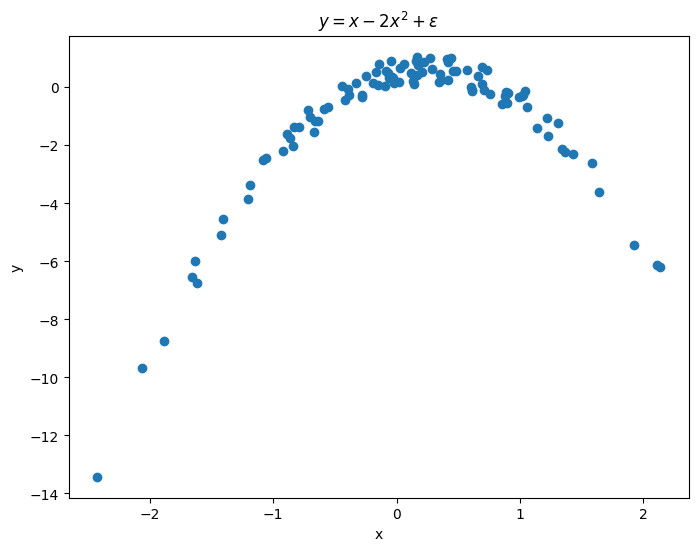

In [119]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.scatter(y=y, x=x)
ax.set_title('$y=x - 2x^{2} + \epsilon$')
ax.set_xlabel('x')
ax.set_ylabel('y')

*(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:*

- (i) $Y = \beta_{0} + \beta_{1}X + \epsilon$

- (ii) $Y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \epsilon$

- (iii) $Y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + \epsilon$

- (iv) $Y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + \beta_{4}X^{4} + \epsilon$

**5. Boston Housing**

In [144]:
boston = pd.read_csv(r'C:\Users\caine\OneDrive\Documents\statistical_learning_problems\0 datasets\Boston.csv')


In [145]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


*(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\hat{\mu}$.*

In [147]:
mu_hat = boston['MEDV'].mean()
mu_hat

22.532806324110677

*(b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.*

In [148]:
mu_hat_stderr = boston['MEDV'].std() / np.sqrt(len(boston))
mu_hat_stderr

0.40886114749753505

*(c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?*

In [161]:
bootstrap_mu_estimates = np.zeros(1000)
for i in range(1000):
    sample_index = np.random.choice(boston.index, len(boston), replace=True)
    sample = boston.loc[sample_index]
    mu_estimate = sample['MEDV'].mean()
    bootstrap_mu_estimates[i] = mu_estimate

print(bootstrap_mu_estimates.mean())
print(bootstrap_mu_estimates.std())

22.53643122529644
0.4057132479780543


The bootstrapp estimate for the standard error of $\mu$ is slightly lower than the answer calculated in b.

*(d) Based on your bootstrap estimate from (c), provide a 95 % confidence interval for the mean of medv. Compare it to the results obtained by using `Boston['medv'].std()` and the two standard error rule*

We can obtain the 95% confidence interval for the mean by utilising distribution function of the bootstrap sample. If we sort the bootstrap estimates for the mean and then take the value at position 25 to be the lower end of the confience interval and 975 to be the upper end of the interval we have a created an interval for the mean that will contain the true value on average 95% of the time.

In [165]:
bootstrap_mu_estimates.sort()
bootstrap_confidence_interval = (bootstrap_mu_estimates[25], bootstrap_mu_estimates[975])
bootstrap_confidence_interval

(21.74090909090909, 23.348418972332013)

Using the two standard error rule we find

In [168]:
twose_rule_confidence_interval = (mu_hat-2*mu_hat_stderr, mu_hat+2*mu_hat_stderr)
twose_rule_confidence_interval

(21.715084029115605, 23.35052861910575)

*(e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median value of medv in the population.*

In [169]:
uhat_med = boston['MEDV'].median()
uhat_med

21.2

*(f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.*

In [170]:
bootstrap_median_estimates = np.zeros(1000)
for i in range(1000):
    sample_index = np.random.choice(boston.index, len(boston), replace=True)
    sample = boston.loc[sample_index]
    median_estimate = sample['MEDV'].median()
    bootstrap_median_estimates[i] = median_estimate


print(bootstrap_median_estimates.mean())
print(bootstrap_median_estimates.std())
    


21.17025
0.3838716419586107


*(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$*

In [171]:
mu_hat_01 = np.percentile(boston['MEDV'], 0.1)
mu_hat_01

5.0

In [172]:
bootstrap_tenthpercentile_estimates = np.zeros(1000)
for i in range(1000):
    sample_index = np.random.choice(boston.index, len(boston), replace=True)
    sample = boston.loc[sample_index]
    tenthpercentile_estimate = np.percentile(sample['MEDV'], 0.1)
    bootstrap_tenthpercentile_estimates[i] = tenthpercentile_estimate


print(bootstrap_tenthpercentile_estimates.mean())
print(bootstrap_tenthpercentile_estimates.std())
    


5.2804400000000005
0.4599651295478821
